In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from sklearn.metrics import mean_squared_error


In [40]:
df = pd.read_csv('sunny_cluster.csv')
df.head()

,Clearsky DHI,GHI,cluster,Temperature,Clearsky DNI,Relative Humidity,Wind Speed,DNI,Cloud Type,Clearsky GHI,DHI,Solar Zenith Angle
0,108,403,1,14.5,889,40.65,3.4,241,7,618,265,54.95
1,114,702,1,15.7,920,36.14,3.7,920,0,702,114,50.20
2,115,715,1,16.4,923,33.37,3.9,923,0,715,115,49.41
3,111,657,1,16.7,901,31.61,4.0,901,1,657,111,52.76
4,100,533,1,16.6,854,30.95,4.0,854,0,533,100,59.55


In [41]:
df.dropna(inplace=True)

In [42]:
df.drop(["cluster"],axis=1,inplace=True)

In [43]:
df.head()

,Clearsky DHI,GHI,Temperature,Clearsky DNI,Relative Humidity,Wind Speed,DNI,Cloud Type,Clearsky GHI,DHI,Solar Zenith Angle
0,108,403,14.5,889,40.65,3.4,241,7,618,265,54.95
1,114,702,15.7,920,36.14,3.7,920,0,702,114,50.20
2,115,715,16.4,923,33.37,3.9,923,0,715,115,49.41
3,111,657,16.7,901,31.61,4.0,901,1,657,111,52.76
4,100,533,16.6,854,30.95,4.0,854,0,533,100,59.55


In [44]:
df.describe()

,Clearsky DHI,GHI,Temperature,Clearsky DNI,Relative Humidity,Wind Speed,DNI,Cloud Type,Clearsky GHI,DHI,Solar Zenith Angle
count,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000
mean,196.069290,732.918872,28.169394,744.552228,23.098088,4.163022,722.517409,0.430362,744.193593,201.089833,40.970286
std,70.114563,193.575924,8.048195,134.986357,11.223323,1.540044,164.395314,1.591959,189.422882,73.647434,15.695106
min,79.000000,320.000000,7.500000,162.000000,4.460000,0.300000,17.000000,0.000000,358.000000,79.000000,5.210000
25%,148.000000,579.000000,21.200000,666.000000,15.297500,3.100000,644.000000,0.000000,600.000000,149.000000,30.105000
50%,181.000000,734.000000,29.500000,770.000000,20.280000,4.200000,760.000000,0.000000,746.000000,184.000000,44.480000
75%,225.000000,899.250000,35.200000,844.000000,29.010000,5.200000,839.000000,0.000000,908.000000,233.000000,53.142500
max,520.000000,1086.000000,44.000000,1008.000000,79.390000,8.700000,1008.000000,8.000000,1086.000000,520.000000,66.840000


In [45]:
s1= MinMaxScaler(feature_range=(-1,1))
Xs= s1.fit_transform(df)

In [46]:

s2=MinMaxScaler(feature_range=(-1,1))
Ys= s2.fit_transform(df[['GHI']])

In [47]:
Xs.shape

(2872, 11)

In [48]:
#Xs.reshape(1,662,6)

In [49]:
Ys.shape

(2872, 1)

In [50]:
window= 5
X=[]
Y=[]
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])

In [51]:
X,Y = np.array(X), np.array(Y)

In [52]:
X_train1, y_train1 = X[:2299], Y[:2299]
X_test1, y_test1 = X[2299:], Y[2299:]
X_train1.shape, y_train1.shape,X_test1.shape, y_test1.shape


((2299, 5, 11), (2299, 1), (568, 5, 11), (568, 1))

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import tensorflow as tf 
model= Sequential()
#model.add(LSTM(units=50,return_sequences=True,input_shape=(X.shape[1],X.shape[2])))  
#model.add(Dropout (0.2))
#model.add(LSTM(units=50,return_sequences=True))

#model.add(Dropout (0.2))
#model.add(LSTM(units=50))
#model.add(Dropout (0.2))
#model.add(Dense(units=1))
#model.compile(optimizer= 'adam',loss='mean_squared_error',metrics=['accuracy'])

# Adding the first LSTM layer and some Dropout regularisation
model.add(Bidirectional(LSTM(units = 72, activation='relu', return_sequences=True,input_shape=(X_train1.shape[1], X_train1.shape[2]))))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units = 96, activation='relu',return_sequences=True )))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units = 36, activation='relu',return_sequences=True )))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units = 84, activation='relu',return_sequences=True )))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units = 48, activation='relu',return_sequences=True )))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units = 120, activation='relu')))
model.add(Dropout(0.1))

# Adding the output layer
model.add(Dense(units = 10))    
model.add(Dense(units = 1))     

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [54]:
#from keras.callbacks import EarlyStopping
#earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=50)
import time 
start= time.time()
history=model.fit(X_train1,y_train1,epochs=60)
end= time.time()
continental= end-start

Epoch 1/60
72/72 [==============================] - 22s 49ms/step - loss: 0.1771 - root_mean_squared_error: 0.4208
Epoch 2/60
72/72 [==============================] - 4s 49ms/step - loss: 0.0554 - root_mean_squared_error: 0.2354
Epoch 3/60
72/72 [==============================] - 3s 47ms/step - loss: 0.0359 - root_mean_squared_error: 0.1896
Epoch 4/60
72/72 [==============================] - 4s 50ms/step - loss: 0.0304 - root_mean_squared_error: 0.1745
Epoch 5/60
72/72 [==============================] - 4s 49ms/step - loss: 0.0281 - root_mean_squared_error: 0.1675
Epoch 6/60
72/72 [==============================] - 4s 52ms/step - loss: 0.0258 - root_mean_squared_error: 0.1605
Epoch 7/60
72/72 [==============================] - 4s 50ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523
Epoch 8/60
72/72 [==============================] - 4s 49ms/step - loss: 0.0236 - root_mean_squared_error: 0.1536
Epoch 9/60
72/72 [==============================] - 4s 55ms/step - loss: 0.0223 - root_

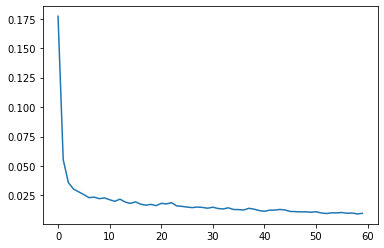

In [55]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [56]:
import time
start=time.time()
Yp= model.predict(X_test1)
end=time.time()
continental=end-start
print("inference time:",continental)
print(Yp)

18/18 [==============================] - 3s 16ms/step
inference time: 3.3070878982543945
[[ 2.64536571e-02]
 [ 3.81891876e-01]
 [ 6.49051547e-01]
 [ 6.37939513e-01]
 [ 3.47504586e-01]
 [-1.10797554e-01]
 [-5.76246321e-01]
 [-5.06166220e-01]
 [-2.82456651e-02]
 [ 3.05415511e-01]
 [ 5.67913651e-01]
 [ 5.74742138e-01]
 [ 3.28105748e-01]
 [-1.03822820e-01]
 [-5.78870952e-01]
 [-5.27524173e-01]
 [ 1.98684018e-02]
 [ 3.21816087e-01]
 [ 6.30082488e-01]
 [ 6.19712949e-01]
 [ 3.54898661e-01]
 [-8.99567381e-02]
 [-5.66531837e-01]
 [-4.92073864e-01]
 [-9.38362554e-02]
 [ 3.11417848e-01]
 [ 5.88623881e-01]
 [ 6.00102901e-01]
 [ 3.47293884e-01]
 [-1.17783919e-01]
 [-5.68001628e-01]
 [-5.02751529e-01]
 [-5.16323708e-02]
 [ 3.27782989e-01]
 [ 6.03372097e-01]
 [ 6.12979710e-01]
 [ 3.06363463e-01]
 [-1.94197044e-01]
 [-5.85536301e-01]
 [-5.33462644e-01]
 [-3.10699381e-02]
 [ 3.07448894e-01]
 [ 5.91136098e-01]
 [ 5.85600257e-01]
 [ 3.04640263e-01]
 [-1.95923373e-01]
 [-5.84247768e-01]
 [-5.22635043e-01]

In [57]:
Yp.shape

(568, 1)

In [58]:
pred= s2.inverse_transform(Yp)

In [59]:
Actual= s2.inverse_transform(y_test1)

In [60]:
x= pred
z= Actual

In [61]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(z,x)
RMSE = math.sqrt(MSE)
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(z,x)
print("Root Mean Square Error:",RMSE)
print("Mean Square Error:", MSE)
print("Mean Absolute Error:",MAE)


Root Mean Square Error: 57.25156441291617
Mean Square Error: 3277.741627726289
Mean Absolute Error: 39.76421243372098


In [62]:
max= x.max()
min= x.min()
mean= x.mean()
max,min,mean

(951.58673, 413.70312, 639.4788)

In [63]:
NRMSE= (RMSE/(max-min))*100
NRMSE

10.643857477502243

In [64]:
Calculated =pd.DataFrame(x, columns = ['Prediction'])
Actual = pd.DataFrame(z, columns = ['Actual'])


In [65]:
Calculated.to_csv(r"E:\CatBoost_1\Johannesburg\LSTM\sunny_hours\prediction.csv")

In [66]:
Actual.to_csv(r"E:\CatBoost_1\Johannesburg\LSTM\sunny_hours\Actual.csv")